# SV model with variational particle filter

In [1]:
import matplotlib.pyplot as plt
import torch

import ptvi

In [2]:
data_seed, algo_seed = 123, 123
params = dict(a=1., b=0., c=.95)
T = 200

In [3]:
model = ptvi.FilteredSVModelDualOpt(
    input_length=T, num_particles=30, resample=True)
model

Stochastic volatility model for dual optimization of model and proposal:
	x_t = exp(a * z_t/2) ε_t      t=1, …, 200
	z_t = b + c * z_{t-1} + ν_t,  t=2, …, 200
	z_1 = b + 1/√(1 - c^2) ν_1
	where ε_t, ν_t ~ Ν(0,1)

Particle filter with 30 particles, AR(1) proposal:
	z_t = d + e * z_{t-1} + η_t,  t=2, …, 200
	z_1 = d + 1/√(1 - e^2) η_1
	where η_t ~ Ν(0,1)

In [4]:
torch.manual_seed(data_seed)
y, z_true = model.simulate(**params)

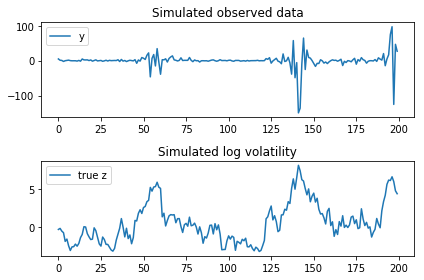

In [5]:
plt.subplot(211); plt.plot(y.numpy(), label='y')
plt.title('Simulated observed data')
plt.legend();
plt.subplot(212); plt.plot(z_true.numpy(), label='true z')
plt.legend()
plt.title('Simulated log volatility');
plt.tight_layout()

In [6]:
torch.manual_seed(algo_seed)
fit = ptvi.dual_sgvb(model, y, sim_entropy=False)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Alternating model/proposal structured ADVI: Particle filtered stochastic volatility model
  - Estimating elbo with M=1;
  - Minimum supremum growth heuristic (min_steps=500, patience=20, skip=10, ε=0.1)
  - Adadelta optimizer with param groups:
    group 0. lr=1.0, rho=0.9, eps=1e-06, weight_decay=0
  - Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed model elbo = -889.60, proposal elbo = -745.19
       1. smoothed model elbo = -919.23, proposal elbo = -991.62
       2. smoothed model elbo = -898.92, proposal elbo =-1092.44
       4. smoothed model elbo =-1185.71, proposal elbo =-1370.87
       8. smoothed model elbo =-1536.40, proposal elbo =-1351.94
      16. smoothed model elbo =-8642.66, proposal elbo =-1133.67
      32. smoothed model elbo =-5812.94, proposal elbo =-1260.40
      64. smoothed model elbo =-2176.95,

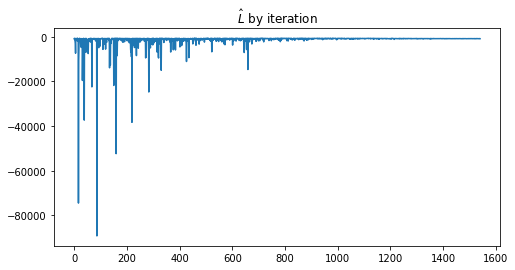

In [7]:
plt.rcParams['figure.figsize'] = [8, 4]
fit.plot_elbos()

In [8]:
fit.summary(true=params)

,mean,sd,true
a,2.890092,0.098671,1.00
b,-0.595039,0.110485,0.00
c,0.457029,0.128532,0.95
d,0.000000,9.532494,NaN
e,0.439437,0.454231,NaN


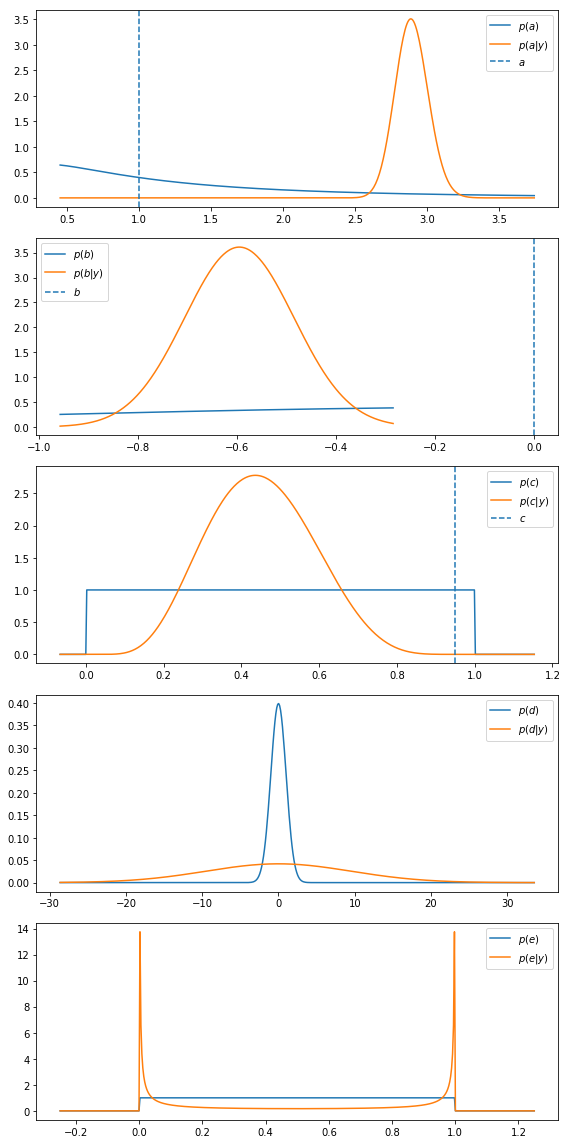

In [9]:
plt.rcParams['figure.figsize'] = [8, 16]
fit.plot_global_marginals(**params, cols=1)

In [10]:
help(fit.plot_global_marginals)

Help on method plot_global_marginals in module ptvi.mvn_posterior:

plot_global_marginals(cols=2, **true_vals) method of ptvi.model.FIVOResult instance



In [11]:
fit.plot_latent(N=50, true_z=z_true)

TypeError: exp(): argument 'input' (position 1) must be Tensor, not TransformedModelParameter

In [ ]:
fit.plot_pred_ci(N=50, α=.1, true_y=y, fc_steps=20)